# IS620 Assignment - High Frequency Words:

1. Choose a corpus of interest.
2. How many total unique words are in the corpus?  
(Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf's law? Explain.
7. In what ways do you think the frequency of  the words in this corpus differ from "all words in all corpora."

In [88]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

%matplotlib inline

## Choose a corpus of interest

The text we will be looking at is the script of the Princess Bride. Let's go ahead and do the following:

* read the file from disk
* tokenize the text
* normalize the text
    * Make sure everything is in lower case, since we don't want to distinguish between pirate and Pirate. (this is done with the w.lower())
    * get rid of all punctuation (we do this with w.isalpha())

In [38]:
fileName = "the_princess_bride_script_clean.txt"
with open(fileName, 'r') as f:
    raw = f.read()

tokens = nltk.word_tokenize(raw)
words = [w.lower() for w in tokens if w.isalpha()]
print "After cleaning we are left with a corpus of {} words".format(len(words))

After cleaning we are left with a corpus of 10653 words


## Unique words

Next, we will determine how many unique words we have. What we really want to see are the words that make this text different, so our definition of unique words will not include common words such as {i, me, my, myself, we, ...}, commonly known as stopwords. Conveniently, nltk comes with a list of these words

In [30]:
uniqueWords = set(words)
uniqueWords = [w for w in uniqueWords if w not in stopwords.words('english')]
print "There are {} unique words in this text".format(len(uniqueWords))

There are 1722 unique words in this text


## Half the total corpus

If we are going to use our definition of unique words, it only seems fair to also remove the stop words from the corpus.

In [45]:
wordsNoStop = [w for w in words if w not in stopwords.words('english')]
len(wordsNoStop)

5634

Now let's see how many unique words we need to make up half the corpus.

In [72]:
# Frequency Distribution
fdist = nltk.FreqDist([w for w in words if w in uniqueWords])
corpusCount = len(wordsNoStop)

cumSum = 0
for i, (w, n) in enumerate(fdist.most_common()):
    cumSum += n
    if cumSum > corpusCount / 2:
        numUniqueWords = i
        break

print "{} of the most common words make up half the corpus".format(numUniqueWords)


138 of the most common words make up half the corpus


## Highest frequency words

The 200 highest frequency (unique) words are:

In [74]:
fdistAll = nltk.FreqDist(words)
fdistAll.most_common()[:200]

[('you', 424),
 ('the', 380),
 ('i', 374),
 ('to', 213),
 ('a', 181),
 ('and', 171),
 ('inigo', 149),
 ('that', 144),
 ('it', 140),
 ('is', 134),
 ('westley', 117),
 ('of', 115),
 ('buttercup', 103),
 ('roberts', 102),
 ('fezzik', 96),
 ('he', 95),
 ('in', 93),
 ('humperdinck', 93),
 ('me', 92),
 ('do', 87),
 ('pirate', 87),
 ('not', 87),
 ('my', 85),
 ('dread', 83),
 ('vizzini', 76),
 ('your', 75),
 ('what', 74),
 ('for', 70),
 ('we', 69),
 ('be', 69),
 ('are', 68),
 ('so', 67),
 ('was', 65),
 ('will', 65),
 ('have', 64),
 ('this', 57),
 ('on', 56),
 ('but', 54),
 ('all', 51),
 ('him', 51),
 ('scene', 50),
 ('no', 49),
 ('as', 46),
 ('there', 44),
 ('grandfather', 43),
 ('can', 42),
 ('with', 40),
 ('miracle', 39),
 ('her', 39),
 ('grandson', 38),
 ('if', 37),
 ('his', 37),
 ('did', 35),
 ('max', 35),
 ('now', 35),
 ('rugen', 34),
 ('think', 33),
 ('love', 32),
 ('at', 32),
 ('would', 31),
 ('man', 31),
 ('well', 31),
 ('never', 30),
 ('where', 29),
 ('count', 29),
 ('one', 28),
 ('ri

## Relative frequency plot

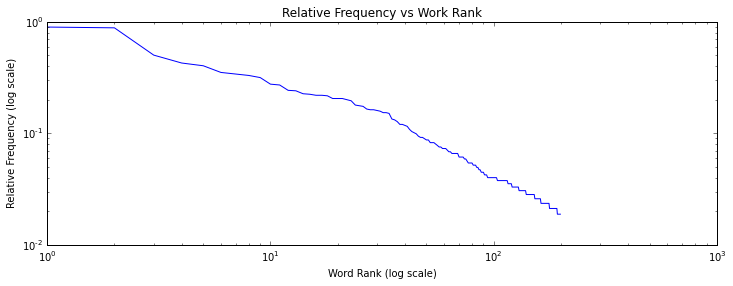

In [100]:
maxCount = fdistAll.most_common()[0][1]
relFreq = [1.0 * i[1] / maxCount for i in fdistAll.most_common()]

fig, ax = plt.subplots(figsize=[12, 4])
ax.plot(relFreq[:200])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Word Rank (log scale)")
ax.set_ylabel("Relative Frequency (log scale)")
ax.set_title("Relative Frequency vs Work Rank")

## Zipf's law

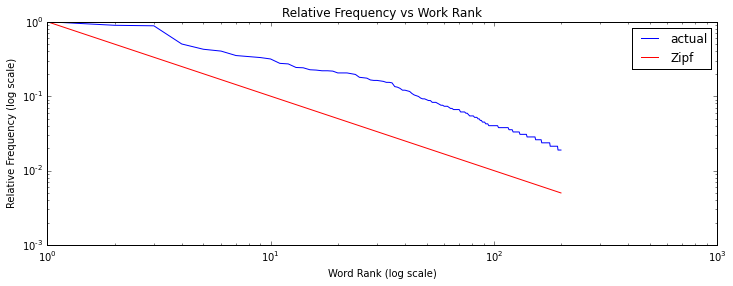

In [135]:
b = 1
x = range(1, 201)
z = [1.0/i**b for i in x]

fig, ax = plt.subplots(figsize=[12, 4])
ax.plot(x, relFreq[:200])
ax.plot(x, z, color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Word Rank (log scale)")
ax.set_ylabel("Relative Frequency (log scale)")
ax.set_title("Relative Frequency vs Work Rank")
ax.legend(['actual', 'Zipf'], loc='upper right')

We can see from the plot above that our particular data set does not exactly follow Zipf's law.

## All words in all corpora

The frequency of the words in this corpus differ from the frequency of "all words in all corpora" in a way that depends on the topic of the specific text. This is the reasoning behind some of the topic modeling techniques such as LDA. By looking at the distribution of words in a document, we should be able to pick out the topics being discussed.